<a href="https://colab.research.google.com/github/ljy9969/Study/blob/master/22-10-21%20Deep%20Learning_Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Dataset
- 6만개 학습용 데이터, 1만개 테스트용 데이터(grayscale)

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist, mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


AttributeError: ignored

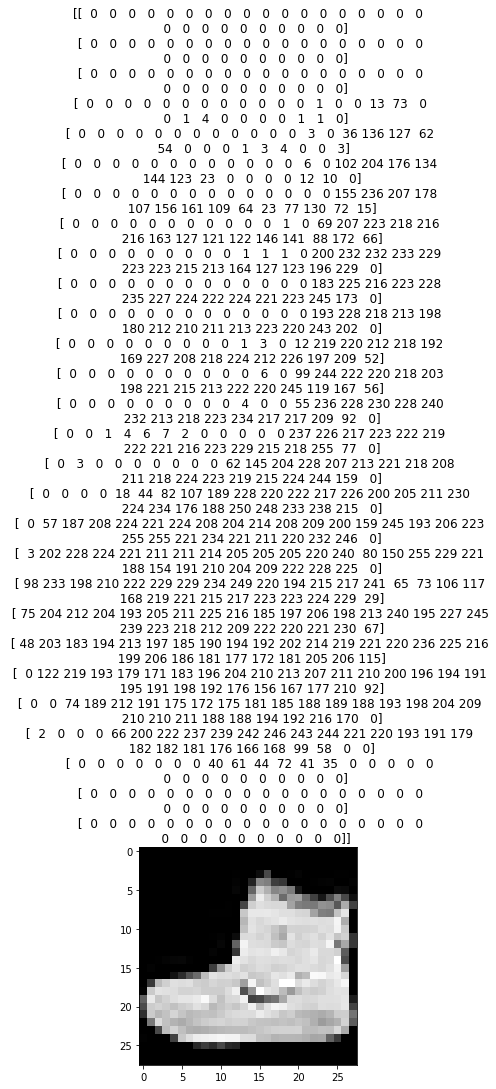

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap = 'gray')
plt.title(train_images[0], train_labels[0])

In [ ]:
print(type(train_labels), pd.DataFrame(train_labels).nunique())

In [6]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

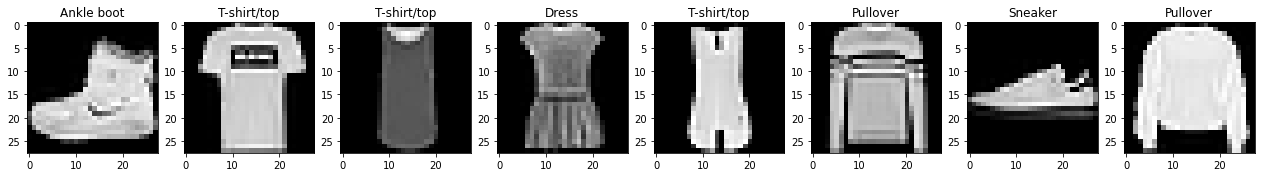

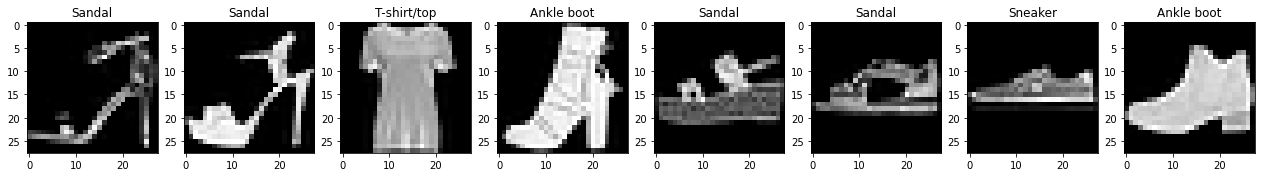

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols = 8):
  figure, axs = plt.subplots(figsize = (22, 6), nrows = 1, ncols = ncols)
  for i in range(ncols):
    axs[i].imshow(images[i], cmap = 'gray')
    axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8])
show_images(train_images[8:16], train_labels[8:16])

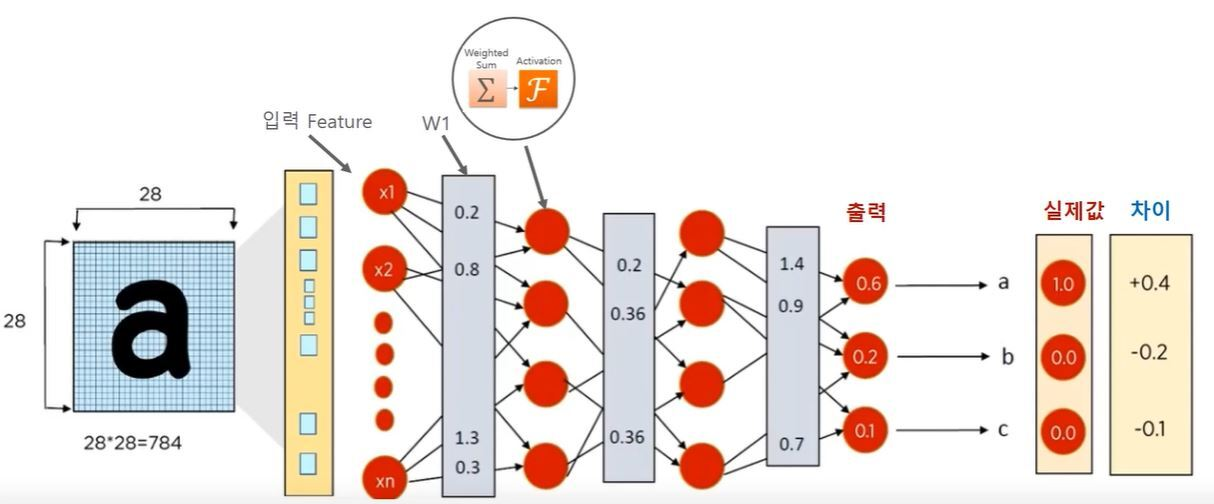

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape = (INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.summary() # Param을 만들 때 + 1을 해주는 이유는 bias(절편)이 하나 더해지고 곱하기 때문에. ex) (784 + 1) * 100 = 78500

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [12]:
history = model.fit(x = train_images, y = train_oh_labels, batch_size = 32, epochs = 20, verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 2.2048 - accuracy: 0.3852
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4179 - accuracy: 0.4494
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9148 - accuracy: 0.6604
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6887 - accuracy: 0.7306
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6233 - accuracy: 0.7457
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5796 - accuracy: 0.7613
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5333 - accuracy: 0.7909
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5021 - accuracy: 0.8123
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4552 - accuracy: 0.8438
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.430

In [13]:
history.history

{'loss': [2.2047905921936035,
  1.4179424047470093,
  0.9147921800613403,
  0.6887213587760925,
  0.6233116984367371,
  0.5796096324920654,
  0.5332597494125366,
  0.5021004676818848,
  0.4551719129085541,
  0.4305599331855774,
  0.40523654222488403,
  0.39610767364501953,
  0.3786069452762604,
  0.3684636056423187,
  0.36831438541412354,
  0.3569925129413605,
  0.35494011640548706,
  0.34506723284721375,
  0.33649781346321106,
  0.33775007724761963],
 'accuracy': [0.38519999384880066,
  0.44944998621940613,
  0.6603999733924866,
  0.7306166887283325,
  0.7457166910171509,
  0.7612500190734863,
  0.7908999919891357,
  0.812333345413208,
  0.843833327293396,
  0.8501833081245422,
  0.8576666712760925,
  0.8595166802406311,
  0.8651000261306763,
  0.8687333464622498,
  0.8696666955947876,
  0.8728333115577698,
  0.8737499713897705,
  0.8772500157356262,
  0.8797500133514404,
  0.8785333037376404]}

In [14]:
# print(f'{history.history['loss']:.2f}')
# print(f'{history.history['accuracy']:.2f}')

# print('{0:.2f}'.format(history.history['loss']))
# print('{0:.2f}'.format(history.history['accuracy']))

# print(round(history.history['loss']), 2)
# print(round(history.history['accuracy']), 2)

print(history.history['loss'])
print(history.history['accuracy'])

[2.2047905921936035, 1.4179424047470093, 0.9147921800613403, 0.6887213587760925, 0.6233116984367371, 0.5796096324920654, 0.5332597494125366, 0.5021004676818848, 0.4551719129085541, 0.4305599331855774, 0.40523654222488403, 0.39610767364501953, 0.3786069452762604, 0.3684636056423187, 0.36831438541412354, 0.3569925129413605, 0.35494011640548706, 0.34506723284721375, 0.33649781346321106, 0.33775007724761963]
[0.38519999384880066, 0.44944998621940613, 0.6603999733924866, 0.7306166887283325, 0.7457166910171509, 0.7612500190734863, 0.7908999919891357, 0.812333345413208, 0.843833327293396, 0.8501833081245422, 0.8576666712760925, 0.8595166802406311, 0.8651000261306763, 0.8687333464622498, 0.8696666955947876, 0.8728333115577698, 0.8737499713897705, 0.8772500157356262, 0.8797500133514404, 0.8785333037376404]


In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
pred_proba = model.predict(test_images) # 각 label에 해당될 확률
print(pred_proba.shape)
print(pred_proba[0])

313/313 [==============================] - 1s 1ms/step
(10000, 10)
[4.3490012e-09 2.3072480e-10 7.3556609e-24 3.1298028e-10 3.5814011e-26
 1.7228799e-02 2.2913206e-13 9.8932050e-03 6.0226523e-07 9.7287738e-01]


In [17]:
sum(pred_proba[0]) # 모든 확률의 합은 1

0.9999999943479128

In [18]:
pred_proba[0].argmax() # 9번째 label일 확률이 가장 높다!

9

In [19]:
pred_proba = model.predict(test_images[0]) # 2차원으로 넣게 되면 에러가 발생할 수 있음

1/1 [==============================] - 0s 48ms/step


In [20]:
test_images[0].shape

(28, 28)

In [21]:
np.expand_dims(test_images[0], axis = 0).shape # np.expand_dims(). 2차원에서 3차원으로 늘어남

(1, 28, 28)

In [22]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis = 0)) # 에러 방지 위해 3차원으로 넣어주자
print('softmax output: ', pred_proba)

1/1 [==============================] - 0s 13ms/step
softmax output:  [[4.3489927e-09 2.3072437e-10 7.3556333e-24 3.1297909e-10 3.5813878e-26
  1.7228784e-02 2.2913119e-13 9.8931948e-03 6.0226353e-07 9.7287738e-01]]


In [23]:
np.squeeze(pred_proba) # 불필요한 2차원을 1차원으로 누름

array([4.3489927e-09, 2.3072437e-10, 7.3556333e-24, 3.1297909e-10,
       3.5813878e-26, 1.7228784e-02, 2.2913119e-13, 9.8931948e-03,
       6.0226353e-07, 9.7287738e-01], dtype=float32)

In [24]:
model.evaluate(test_images, test_oh_labels, batch_size = 64)

157/157 [==============================] - 1s 2ms/step - loss: 0.4891 - accuracy: 0.8534


[0.48906123638153076, 0.8533999919891357]

In [26]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype = np.float32) # 픽셀 값 범위가 0 ~ 255. 나눠서 0과 1 사이로 만들어 주겠다
  labels = np.array(labels, dtype = np.float32)

  return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [32]:
len(train_images[30]) # (28, 28)
train_images[30]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, \
                                                                test_size = 0.15, random_state = 2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


In [34]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape = (INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
history = model.fit(x = tr_images, y = tr_oh_labels, batch_size = 128, validation_data = (val_images, val_oh_labels), epochs = 20, verbose = 1)

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.5938 - accuracy: 0.7972 - val_loss: 0.4523 - val_accuracy: 0.8410
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8545 - val_loss: 0.4103 - val_accuracy: 0.8501
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3739 - accuracy: 0.8671 - val_loss: 0.3836 - val_accuracy: 0.8588
Epoch 4/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3460 - accuracy: 0.8774 - val_loss: 0.3995 - val_accuracy: 0.8556
Epoch 5/20
399/399 [==============================] - 2s 5ms/step - loss: 0.3284 - accuracy: 0.8821 - val_loss: 0.3653 - val_accuracy: 0.8667
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3129 - accuracy: 0.8866 - val_loss: 0.3690 - val_accuracy: 0.8676
Epoch 7/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2992 - accuracy: 0.8913 - val_loss: 0.3562 - val_accuracy: 0.8727
Epoch 

In [36]:
history.history

{'loss': [0.5938059091567993,
  0.4135684072971344,
  0.3739333748817444,
  0.3460032641887665,
  0.32840922474861145,
  0.31291308999061584,
  0.29919639229774475,
  0.2911835312843323,
  0.28151655197143555,
  0.2684507668018341,
  0.2612377405166626,
  0.2544056177139282,
  0.24785521626472473,
  0.23993629217147827,
  0.233610600233078,
  0.227811798453331,
  0.22265873849391937,
  0.21708595752716064,
  0.21404233574867249,
  0.20923414826393127],
 'accuracy': [0.7971568703651428,
  0.8545294404029846,
  0.8671372532844543,
  0.8774117827415466,
  0.8821372389793396,
  0.8866470456123352,
  0.8913333415985107,
  0.8938627243041992,
  0.895784318447113,
  0.9013529419898987,
  0.9032157063484192,
  0.9055882096290588,
  0.9087255001068115,
  0.9113725423812866,
  0.91354900598526,
  0.9159607887268066,
  0.9165686368942261,
  0.9188235402107239,
  0.9199607968330383,
  0.9228823781013489],
 'val_loss': [0.4523078203201294,
  0.410312682390213,
  0.38355809450149536,
  0.39951133728

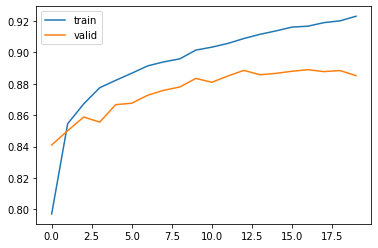

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)

In [41]:
model.evaluate(test_images, test_oh_labels, batch_size = 256, verbose = 1)

40/40 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8800


[0.36215850710868835, 0.8799999952316284]